In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import numpy as np

In [8]:
tau = 26.0             # lifetime of charged pion (ns)
dt = 0.25             # size of time interval (ns)
N = 400                # number of time bins
prob = dt/tau          # decay probability in interval dt

Npi = 100000           # inital pi
Nmu = 0                # initial mu
np.random.seed(12345)  # seed

Nmin, Nmax = 0,399    # fit range
def fdy(t, p1, p2):    # fit function
    return p1*np.exp(-t/p2)

time = np.arange( 0.0, N*dt, dt, dtype=float) # times
Npidata = np.zeros( N, dtype=float)  # pion population
Nmudata = np.zeros( N, dtype=float)  # muon population
Ndydata = np.zeros( N, dtype=float) # number of decays

for it in range(N): # loop over time steps
    Ndy = 0
    for ip in range(Npi): # loop over surviving pions
        if np.random.ranf() < prob:
            Ndy += 1
    
    Npi -= Ndy
    Nmu += Ndy
    
    Npidata[it] = Npi
    Nmudata[it] = Nmu
    Ndydata[it] = Ndy

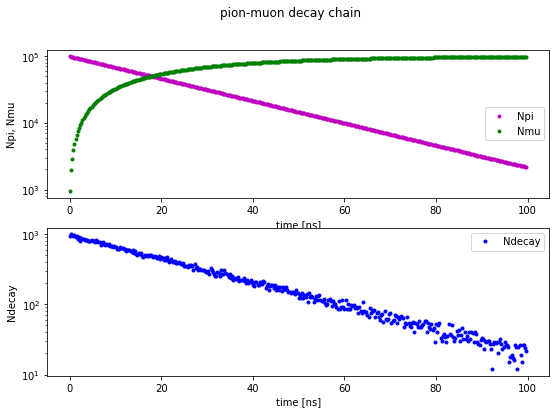

In [9]:
fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('pion-muon decay chain')

axes[0].plot(time,Npidata,"m.",label="Npi")
axes[0].plot(time,Nmudata,"g.",label="Nmu")
axes[0].set_xlabel("time [ns]")
axes[0].set_ylabel("Npi, Nmu")
axes[0].set_yscale('log')
axes[0].legend()

axes[1].plot(time,Ndydata,"b.",label="Ndecay")
axes[1].set_xlabel("time [ns]")
axes[1].set_ylabel("Ndecay")
axes[1].set_yscale('log')
axes[1].legend()

tau_pi 25.99 +/-  0.01
chi2 80449.96, chi2/ndf 202.64


Text(0, 0.5, 'Ndecay')

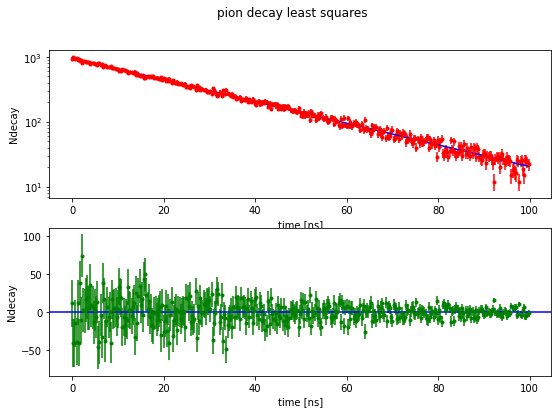

In [11]:
# equal uncertainties

pars, covs = fit.curve_fit( fdy, time[Nmin:Nmax],  Ndydata[Nmin:Nmax], p0=[Npi,25.], absolute_sigma=True)

Nfit = fdy(time, pars[0], pars[1])
residuals = (Nfit - Ndydata)
chi2 = np.sum(residuals**2)
chi2pdf = chi2/(len(time[Nmin:Nmax])-2)

print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
print( "chi2 %5.2f, chi2/ndf %5.2f" % (chi2, chi2pdf))

fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('pion decay least squares')

axes[0].errorbar(time, Ndydata,yerr=np.sqrt(Ndydata), fmt="r.")
axes[0].plot(time,Nfit,"b-")
axes[0].set_xlabel("time [ns]")
axes[0].set_ylabel("Ndecay")
axes[0].set_yscale('log')

axes[1].errorbar(time, residuals, yerr=np.sqrt(Ndydata), fmt="g.")
axes[1].axhline( y=0.0, color='b', linestyle='-')
axes[1].set_xlabel("time [ns]")
axes[1].set_ylabel("Ndecay")

tau_pi 25.87 +/-  0.11
chi2 300.69, chi2/ndf  0.76


Text(0, 0.5, 'Ndecay')

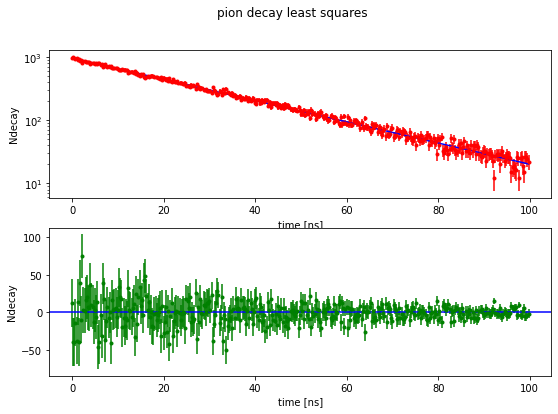

In [14]:
# sqrt(N) uncertainties
s = np.sqrt(Ndydata)+1 # note fix for zero bin counts
pars, covs = fit.curve_fit( fdy, time[Nmin:Nmax],  Ndydata[Nmin:Nmax], p0=[Npi,25.], sigma=s[Nmin:Nmax], absolute_sigma=True)

Nfit = fdy(time, pars[0], pars[1])
residuals = (Nfit - Ndydata)
chi2 = np.sum(residuals[Nmin:Nmax]**2/s[Nmin:Nmax]**2)
chi2pdf = chi2/(len(time[Nmin:Nmax])-2)

print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
print( "chi2 %5.2f, chi2/ndf %5.2f" % (chi2, chi2pdf))

fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('pion decay least squares')

axes[0].errorbar(time, Ndydata, yerr=s, fmt="r.")
axes[0].plot(time,Nfit,"b-")
axes[0].set_xlabel("time [ns]")
axes[0].set_ylabel("Ndecay")
axes[0].set_yscale('log')

axes[1].errorbar(time, residuals, yerr=s, fmt="g.")
axes[1].axhline( y=0.0, color='b', linestyle='-')
axes[1].set_xlabel("time [ns]")
axes[1].set_ylabel("Ndecay")

tau_pi 26.00 +/-  0.10
chi2 356.57, chi2/ndf  0.90


Text(0, 0.5, 'Ndecay')

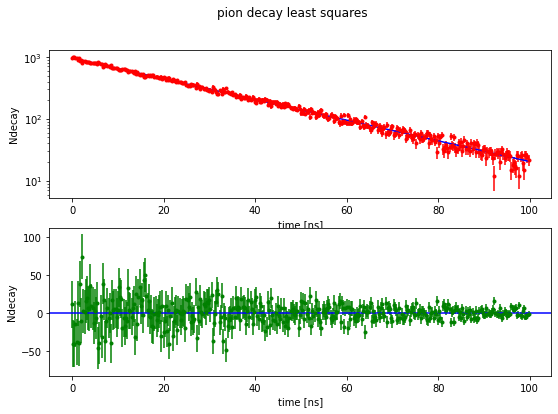

In [15]:
# sqrt(Nfit) uncertainties
s = np.sqrt(Nfit)
pars, covs = fit.curve_fit( fdy, time[Nmin:Nmax],  Ndydata[Nmin:Nmax], p0=[Npi,25.], sigma=s[Nmin:Nmax], absolute_sigma=True)

Nfit = fdy(time, pars[0], pars[1])
residuals = (Nfit - Ndydata)
chi2 = np.sum(residuals[Nmin:Nmax]**2/s[Nmin:Nmax]**2)
chi2pdf = chi2/(len(time[Nmin:Nmax])-2)

print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
print( "chi2 %5.2f, chi2/ndf %5.2f" % (chi2, chi2pdf))

fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('pion decay least squares')

axes[0].errorbar(time, Ndydata, yerr=s, fmt="r.")
axes[0].plot(time,Nfit,"b-")
axes[0].set_xlabel("time [ns]")
axes[0].set_ylabel("Ndecay")
axes[0].set_yscale('log')

axes[1].errorbar(time, residuals, yerr=s, fmt="g.")
axes[1].axhline( y=0.0, color='b', linestyle='-')
axes[1].set_xlabel("time [ns]")
axes[1].set_ylabel("Ndecay")

tau_pi 26.00 +/-  0.10
chi2 353.35, chi2/ndf  0.89


Text(0, 0.5, 'Ndecay')

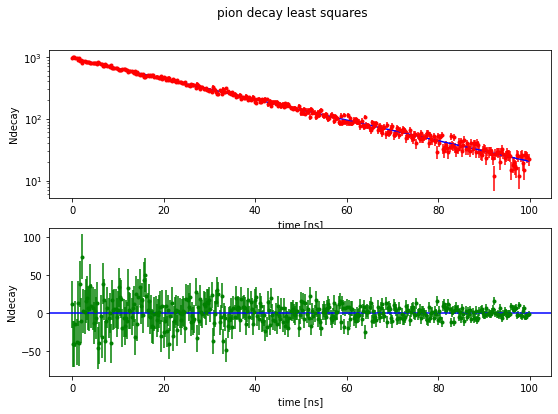

In [16]:
# iterated sqrt(Nfit) uncertainties
s = np.sqrt(Nfit)
pars, covs = fit.curve_fit( fdy, time[Nmin:Nmax],  Ndydata[Nmin:Nmax], p0=[Npi,25.], sigma=s[Nmin:Nmax], absolute_sigma=True)

Nfit = fdy(time, pars[0], pars[1])
residuals = (Nfit - Ndydata)
chi2 = np.sum(residuals[Nmin:Nmax]**2/s[Nmin:Nmax]**2)
chi2pdf = chi2/(len(time[Nmin:Nmax])-2)

print( "tau_pi %5.2f +/- %5.2f" % (pars[1], np.sqrt(covs[1][1])))
print( "chi2 %5.2f, chi2/ndf %5.2f" % (chi2, chi2pdf))

fig, axes = plt.subplots(2,figsize=(9, 6))
fig.suptitle('pion decay least squares')

axes[0].errorbar(time, Ndydata, yerr=s, fmt="r.")
axes[0].plot(time,Nfit,"b-")
axes[0].set_xlabel("time [ns]")
axes[0].set_ylabel("Ndecay")
axes[0].set_yscale('log')

axes[1].errorbar(time, residuals, yerr=s, fmt="g.")
axes[1].axhline( y=0.0, color='b', linestyle='-')
axes[1].set_xlabel("time [ns]")
axes[1].set_ylabel("Ndecay")